In [59]:
from IPython.display import display, Latex
from IPython.core.display import HTML
%reset -f
%matplotlib inline
%autosave 300
import matplotlib.pylab as plt
import sympy as sy
import numpy as np

Autosaving every 300 seconds


# Feuille mémoire

# Résolution par méthode spectrale 

On considère le problème aux limites suivant
$$
\begin{cases}
    -u''(x)+u(x)=f(x) & \text{pour } x\in [0,1],\\
    u(0)=u(1),\quad u'(0)=u'(1), \text{(condition limite périodique)},
\end{cases} 
$$
où $f$ est une fonction donnée.
### Solution exacte
Choisir une fonction $u$ respectant les conditions limites et calculer $f$ à l'aide de la librairie sympy.

On va choisir $u(x)=x(\sin(2\pi x))^4+1$ qui est bien $1$-périodique. u est bien choisit ici car il faut pas que u soit trop parfaite par rapport a l'espace d'approximation !

### Représentation d'un cas exacte et fonctionnelle pour verifier notre approche plus tard 

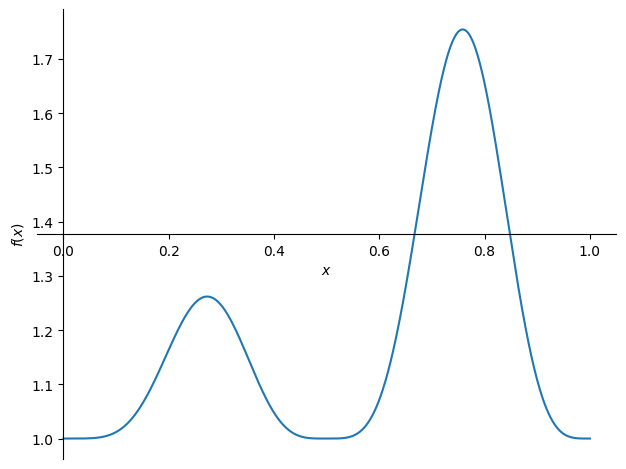

f(x)=


x*sin(2*pi*x)**4 - 16*pi*(-pi*x*sin(2*pi*x)**2 + 3*pi*x*cos(2*pi*x)**2 + sin(4*pi*x)/2)*sin(2*pi*x)**2 + 1

In [60]:

# on definit la variable x

x=sy.symbols('x',real=True)


#on definit u qu'on a choisit précédement puis on l'affiche

u=x*sy.sin(2*sy.pi*x)**4+1
sy.plot(u,(x,0,1))

# on calcule f a l'aide de sy.diff pour calculer les derivées et on donne sont expression  

print('f(x)=')
ff=-sy.diff(u,x,2)+u
ff=ff.simplify()
display(ff)




f=sy.lambdify(x,ff,'numpy')
uexact=sy.lambdify(x,u,'numpy')

## Méthode spectrale
- Proposer, dans une cellule Markdown, une base d'approximation de 
    dimension $n$ induite par une méthode de Galerkine de type spectrale.
On considère l'espace de fonction $V_n$ engendré par les fonctions 
    $\{\phi_k\}_{k=0}^{n-1}$ définies par 
$$\phi_0(x)=1, ~\phi_1(x)=\cos(2\pi  x),~ \phi_2(x)=\sin(2\pi  x),~\phi_3(x)=\cos(2\pi  2 x),~ \phi_4(x)=\sin(2\pi 2 x),~\cdots.$$
Ainsi pour $k>0$, $\phi_{2k}(x)=\sin(2\pi  k x)$ et $\phi_{2k-1}(x)=\cos(2\pi  k x)$.
- Décomposer $f$, construite précédemment, sur cette base d'approximation 
    dans une cellule python.
On va utiliser la fonction rfft de la librairie scipy fft.pack qui prend en entrée le vecteur de taille $n$ des évaluations de $f$ sur les $n$ points de la discrétisation uniforme de $[0,L-dx]$ de pas $dx$  et qui renvoie les $n$ coefficients de Fourier de $f$ qui sont les coefficients dans la base $V_n$ (à un facteur dépendant de $n$ près, voir cours).

# passons au code 


fchap=


array([ 2.37500000e+01,  1.20792265e-13,  6.85845506e+01, -3.97284176e+02,  5.24168975e+01, -4.10338430e-13, -2.59666110e+02,  3.95409176e+02, -1.31717911e+02,  1.27897692e-13,  7.90375725e+01,
       -2.84217094e-14,  2.71884318e+01,  2.39808173e-13,  1.27555227e+01, -8.52651283e-14,  6.41662055e+00, -6.39488462e-14,  2.75146565e+00,  2.55795385e-13])

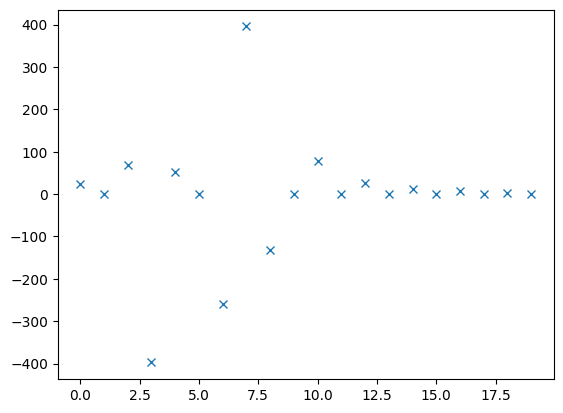

In [116]:
from scipy.fftpack import rfft, irfft #pour faire la transformée et la transformée inverse 



N=20  # nb de pts 



dx=L/N #calcule du pas 

L=1 #taille de omega 

x=np.linspace(0,L-dx,N) # un vecteur de x a chaque pas 

fchap=rfft(f(x)) #transformée de fourrier discrete sur le vecteur x de f 

plt.plot(fchap,'x') # représent les valeurs de la transformée à chauqe x 

print('fchap=')
display(fchap)

- Ecrire le problème approché au limite dans cet espace 
    d'approximation (rédaction Markdown).

On cherche $u_n\in V_n$ tel que
$$
    -u_n''(x)+u_n(x)=\sum_{k=0}^{n-1}\hat{u}_k(\lambda_k+1)\phi_k(x)=\sum_{k=0}^{n-1}\hat{f}_k\phi_k(x),
$$
où $\hat{f}_k$ sont les coefficients de Fourier de $f$, $\hat{u}_k$ sont les coefficients de Fourier de $f$ et $\lambda_k$ sont les valeurs propres de $-\partial_x^2$ dans $V_n$:
$$
   -\phi_k''(x)= \lambda_k \phi_k(x).
$$
On identifie les coefficients de Fourier des deux membres de l'équation précédente pour obtenir :
$$
    \hat{u}_k=\frac{\hat{f}_k}{\lambda_k+1}.
$$
Ainsi, la solution approchée est donnée par
$$
    u_n(x)=\sum_{k=0}^{n-1}\frac{\hat{f}_k}{\lambda_k+1}\phi_k(x).
$$
- Résoudre le problème approché en python et tracer le graphe de la solution.
    - Comparer graphiquement la solution exacte et la solution approchée.
    - Etudier la convergence de la solution approchée en fonction de $n$. Conclure. (voir cours)


On a bien supperposition de la solution exacte et de la solution approchée
Erreur= 5.823552440276103e-08


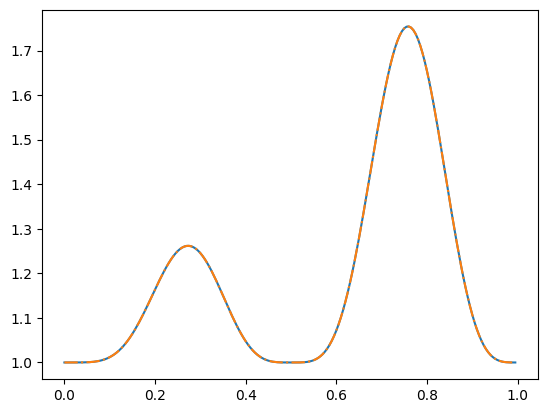

In [25]:
from scipy.fftpack import rfft, irfft
N=200
L=1
dx=L/N


x=np.linspace(0,L-dx,N)
fchap=rfft(f(x))

kk=np.zeros(N)
kk[1::2]=range(1,(N)//2 +1)
kk[2::2]=range(1,(N+1)//2)

lammb=(2*np.pi*kk/L)**2
uchap=fchap/(1+lammb)
u=irfft(uchap)
plt.plot(x,u)
plt.plot(x,uexact(x),'-.')
print('On a bien supperposition de la solution exacte et de la solution approchée')
print('Erreur=',max(abs(u-uexact(x))))

Erreur = 0.37077549647928953


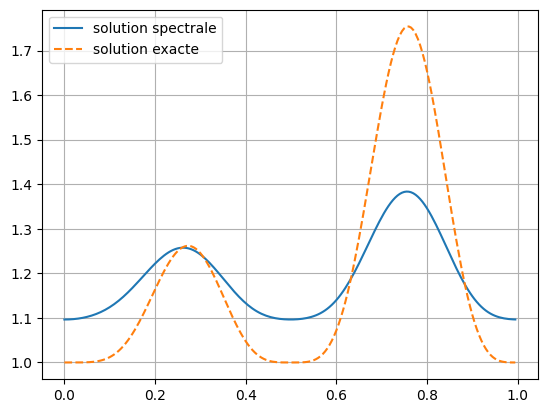

In [ ]:
from scipy.fftpack import rfft, irfft
import numpy as np
import matplotlib.pyplot as plt

N = 200
L = 1
dx = L/N

x = np.linspace(0, L-dx, N)

# Transformée de Fourier de f
fchap = rfft(f(x))

# VRAIES fréquences associées à rfft
k = np.arange(len(fchap))

# VRAIES valeurs propres
lamb = (2*np.pi*k/L)**2

# Résolution spectrale
uchap = fchap / (1 + lamb)

# Retour en espace réel
u = irfft(uchap)

# Affichage
plt.plot(x, u, label="solution spectrale")
plt.plot(x, uexact(x), '--', label="solution exacte")
plt.legend()
plt.grid(True)

print("Erreur =", max(abs(u - uexact(x))))


# Méthode DF

On considère le problème aux limites suivant
$$
\begin{cases}
    -(a(x)u'(x))'+u(x)=f(x) & \text{pour } x\in [0,L],\\
    u(0)=1,\quad u(L)=2, \text{(condition limite périodique)},
\end{cases} 
$$

# 1: Coder le sytème en stockage creux de l'approximation de DF centrée 
# 2: Choisir une solution analytique 
# 3: comparer le graph et la solution approchée 
# 4: convergence en grille : ordre de la méthode 
# 5: Application a la discontinue 
# 6: Si possible application à la composite 


[[ 76.14       -38.89         0.           0.           0.        ]
 [-38.89        84.3        -44.41         0.           0.        ]
 [  0.         -44.41        98.22       -52.81         0.        ]
 [  0.           0.         -52.81       117.9        -64.09      ]
 [  0.           0.           0.          76.46972222 143.34      ]]


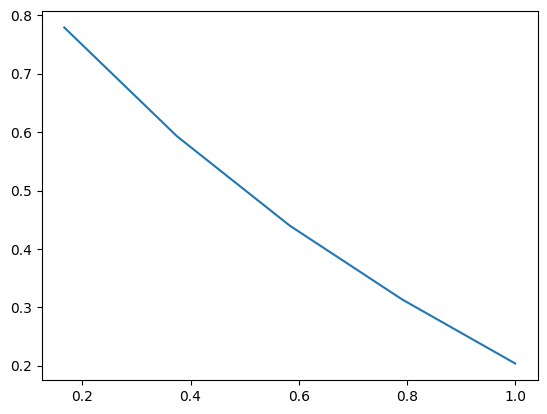

In [38]:
from scipy.sparse import spdiags
from scipy.sparse import csc_array
from scipy.sparse.linalg import spsolve

# le pas h
N=5
L=1
h=1/(N+1)


#CONSTRUCTION DU VECTEUR DE DISCR2TISATION 

x=np.linspace(h,L,N)

xd=np.linspace(h/2,L+h/2,N+1)

xd_g=xd[:-1]
xd_d=xd[1:]

x_avec_CL=np.linspace(0,L,N+2)

#construction de la fonction f de notre choix 
f=lambda x : x**2


#construction de a
#a=lambda x :np.sin(x)
a=lambda x :1+x**2
#construction du second mebre 
F=f(x)

F[0] += a(xd[0])/h**2
F[-1]+= 4*a(xd[-1])/h

#construction matrice en système en stockage creux
 
D0=1+(a(xd_g)+a(xd_d))/h**2*np.ones(N) 
D1=-a(xd_g)/h**2*np.ones(N)
D2=-a(xd_d)/h**2*np.ones(N)

D2[N-2]=-a(xd_g[-1])+a(xd_d[-1])/h**2

A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D2,[-1],N,N)

A=A.tocsr()

U=spsolve(A,F)



print(A.toarray())
plt.plot(x,U)

In [96]:
a1=lambda x :1+x**2

u1=lambda x :np.cos(2*np.pi*x/L)+2*x


x1, L1 = sy.symbols('x1 L1', real=True, positive=True)

a_expr = 1 + x1**2
u_expr = sy.cos(2*sy.pi*x1/L1) + 2*x1
f_expr = -sy.diff(a_expr * sy.diff(u_expr, x1), x1) + u_expr
f_expr = sy.simplify(f_expr)


print("f(x) =")
display(f_expr)




f(x) =


(L1**2*(2*x1 + cos(2*pi*x1/L1)) - 4*L1*x1*(L1 - pi*sin(2*pi*x1/L1)) + 4*pi**2*(x1**2 + 1)*cos(2*pi*x1/L1))/L1**2

[[  80805.515025  -40403.265025       0.       ...       0.             0.             0.      ]
 [ -40403.265025   80811.565125  -40407.3001   ...       0.             0.             0.      ]
 [      0.        -40407.3001     80821.655325 ...       0.             0.             0.      ]
 ...
 [      0.             0.             0.       ...  159995.555325  -80197.2601         0.      ]
 [      0.             0.             0.       ...  -80197.2601    160797.505125  -80599.245025]
 [      0.             0.             0.       ...       0.       -161602.495025  161603.495025]]


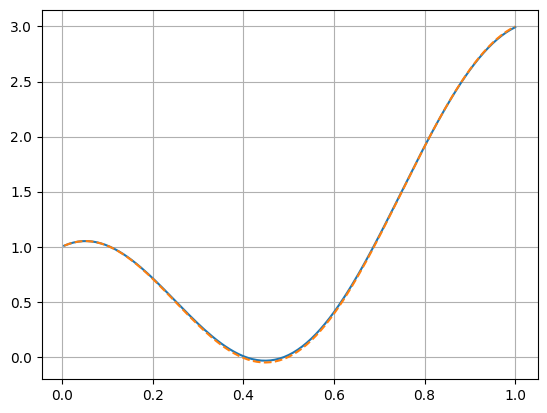

In [111]:
from scipy.sparse import spdiags
from scipy.sparse import csc_array
from scipy.sparse.linalg import spsolve



L=1

f1=lambda x :( L**2*(2*x + np.cos((2*np.pi*x)/L))-4*L*x*(L-np.pi*np.sin((2*np.pi*x)/L))+4*((np.pi)**2)*(x**2 + 1)*np.cos((2*np.pi*x)/L) )/L**2

# le pas h
N=200
L=1
h=1/(N+1)

x=np.linspace(h,L,N)

xd=np.linspace(h/2,L+h/2,N+1)

xd_g=xd[:-1]
xd_d=xd[1:]


F=f1(x)

F[0] += a1(xd[0])/h**2
F[-1] += a1(xd[-1])*4/h

#F[-1] += 2 * a1(xd_d[-1]) / h


#construction matrice en système en stockage creux
 
D0=(1+(a1(xd_g)+a1(xd_d))/h**2)*np.ones(N) 
D1=(-a1(xd_g)/h**2)*np.ones(N)
D2=(-a1(xd_d)/h**2)*np.ones(N)

D2[-2]=(-a1(xd[-2])-a1(xd[-1]))/h**2



#D0[-1] = 1 + a1(xd_g[-1])/h**2   # on enlève a_{N+1/2} de D0
#D2[-2] = 0.0  

A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D2,[-1],N,N)

A=A.tocsr()

U=spsolve(A,F)


np.set_printoptions(linewidth= 200)
#np.set_printoptions(l)
print(A.toarray())

#print(x)
plt.plot(x,U)


plt.plot(x, u1(x),"--")
plt.grid(True)
plt.show()

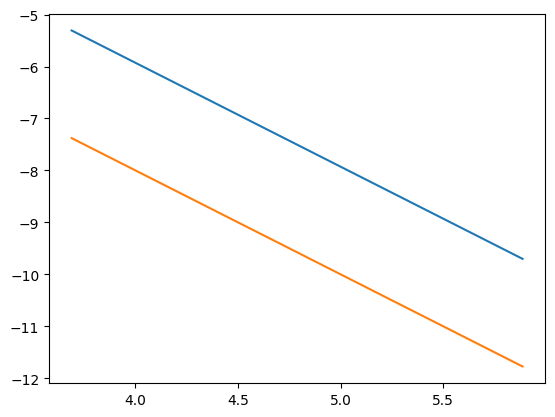

In [ ]:
def err(N):

    L=1
    h = L/N
    

    x=np.linspace(h,L,N)

    xd=np.linspace(h/2,L+h/2,N+1)

    xd_g=xd[:-1]
    xd_d=xd[1:]

    F=f1(x)

    F[0] += a1(xd[0])/h**2
    F[-1] += a1(xd[-1])*4/h

    #F[-1] += 2 * a1(xd_d[-1]) / h


    #construction matrice en système en stockage creux
 
    D0=(1+(a1(xd_g)+a1(xd_d))/h**2)*np.ones(N) 
    D1=(-a1(xd_g)/h**2)*np.ones(N)
    D2=(-a1(xd_d)/h**2)*np.ones(N)

    D2[-2]=(-a1(xd[-2])-a1(xd[-1]))/h**2



    #D0[-1] = 1 + a1(xd_g[-1])/h**2   # on enlève a_{N+1/2} de D0
    #D2[-2] = 0.0  

    A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D2,[-1],N,N)

    A=A.tocsr()

    U=spsolve(A,F)
    
    UU = u1(x)

    return max(abs(U-UU))



errlist=[]
Nlist=[]
for N in range(40,400,40):
    errlist.append(np.log(err(N)))
    Nlist.append(np.log(N))
plt.plot(Nlist,errlist)
tlist=tlist = np.array(Nlist)

tlist = np.array(Nlist)
plt.plot(tlist,-2*(tlist))




[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


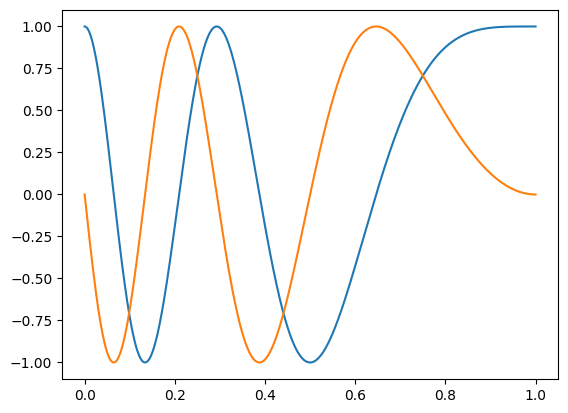

In [126]:

L=1
N=10
h=L/N
x=np.linspace(0,L-h,N)

print (x)


u0=lambda x :np.cos((2*x-2)**2*np.pi)

u2=lambda x :np.sin((2*x-2)**2*np.pi)


x=np.linspace(0,L,1000)


plt.plot(x,u0(x))
plt.plot(x,u2(x))

